In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [3]:
summer= data[data.Season=='Summer']
summer.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
155440,78029,Mario Medda,M,33.0,179.0,70.0,Italy,ITA,1976 Summer,1976,Summer,Montreal,Modern Pentathlon,Modern Pentathlon Men's Team,NaN
95471,48332,Barnabs Hevesy,M,30.0,182.0,78.0,Hungary,HUN,1980 Summer,1980,Summer,Moskva,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN
257417,128894,Kumiko Watanabe (-Kaneto),F,28.0,159.0,63.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Diving,Diving Women's Springboard,NaN
244109,122237,Rainer Tscharke,M,26.0,186.0,82.0,East Germany,GDR,1968 Summer,1968,Summer,Mexico City,Volleyball,Volleyball Men's Volleyball,NaN
44047,22692,"Barthold Wayne ""Bart"" Conner",M,26.0,165.0,58.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [5]:
yearandsex=summer[['Year', 'Sex']] 
yearandsex.head()

,Year,Sex
0,1992,M
1,2012,M
2,1920,M
3,1900,M
26,1932,F


In [6]:
female=pd.read_csv('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/120-years-of-olympic-history-athletes-and-results/female_tidy_df.csv')

In [7]:
female.head()

,Unnamed: 0,year,sex,frequencies
0,1,1896,F,0
1,2,1900,F,33
2,3,1904,F,16
3,4,1906,F,11
4,5,1908,F,47


In [8]:
female = female.drop(female.columns[[0]], axis=1)
female.head()

,year,sex,frequencies
0,1896,F,0
1,1900,F,33
2,1904,F,16
3,1906,F,11
4,1908,F,47


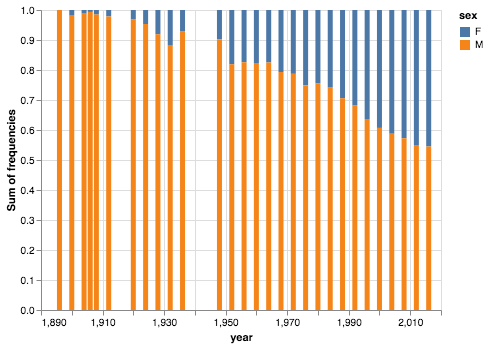

In [9]:
alt.Chart(female).mark_bar().encode(
    x='year',
    y=alt.Y('sum(frequencies)', stack="normalize"),
    color=alt.Color('sex'),
)

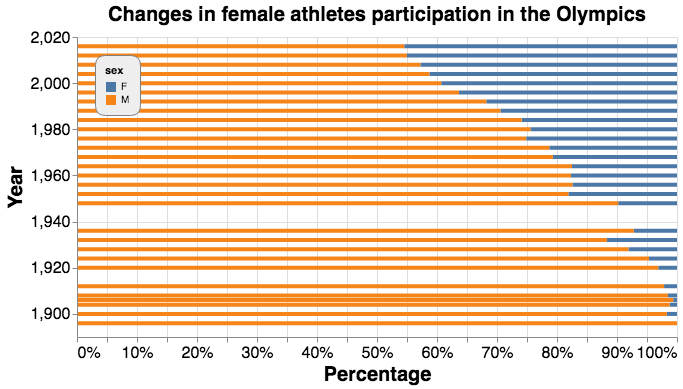

In [10]:

alt.Chart(female, title = 'Changes in female athletes participation in the Olympics').mark_bar(size=4).encode(
    x=alt.X('sum(frequencies)', stack="normalize", axis=alt.Axis(format='%', title='Percentage')),
    y=alt.Y('year',title='Year'),
    color=alt.Color('sex'),
    tooltip=['sex','frequencies']).interactive().properties(
    width=600,
    height=300).configure_title(
    fontSize=20).configure_axis(
    labelFontSize=16,
    titleFontSize=20
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    orient='top-left'
)

In [11]:
legend=alt.Legend(orient="left")

In [12]:
summer.Year.astype('category')
len(summer.Year)

222552

In [13]:
df1 = summer[['Year','Season']]
df1.head()

,Year,Season
0,1992,Summer
1,2012,Summer
2,1920,Summer
3,1900,Summer
26,1932,Summer


In [14]:
summer.loc[summer['Year'] == 2004].head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN


In [15]:
summer[summer.Year == 2004].head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN


In [16]:
len(female)

58

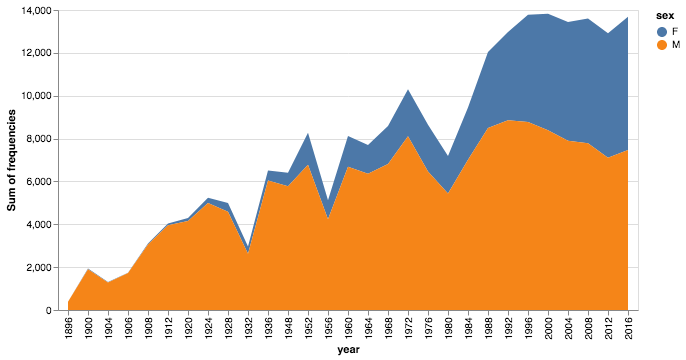

In [17]:
alt.Chart(female).mark_area().encode(
    x="year:N",
    y="sum(frequencies):Q",
    color="sex:N",
    tooltip=['sex','frequencies']
)

In [18]:
female_dcast=pd.read_csv('/Users/Tal/Desktop/2019 Fall/Data Visualization/final project/120-years-of-olympic-history-athletes-and-results/female_dcast.csv')

In [19]:
female_dcast.head()

,Unnamed: 0,year,F,M,all,f_prct
0,1,1896,0,380,380,0.000000
1,2,1900,33,1903,1936,0.017045
2,3,1904,16,1285,1301,0.012298
3,4,1906,11,1722,1733,0.006347
4,5,1908,47,3054,3101,0.015156


In [20]:
female_dcast = female_dcast.drop(female_dcast.columns[[0]], axis=1)

In [21]:
female_dcast.head()

,year,F,M,all,f_prct
0,1896,0,380,380,0.000000
1,1900,33,1903,1936,0.017045
2,1904,16,1285,1301,0.012298
3,1906,11,1722,1733,0.006347
4,1908,47,3054,3101,0.015156


In [22]:
female_dcast_tidy_df=pd.melt(female_dcast,id_vars=['year','all','f_prct'],var_name='sex',value_name='frequencies')

In [23]:
female_dcast_tidy_df.head()

,year,all,f_prct,sex,frequencies
0,1896,380,0.000000,F,0
1,1900,1936,0.017045,F,33
2,1904,1301,0.012298,F,16
3,1906,1733,0.006347,F,11
4,1908,3101,0.015156,F,47


In [24]:
female_dcast_tidy_df['female_percent']=female_dcast_tidy_df.f_prct.mul(100).round(1)
female_dcast_tidy_df.tail()

,year,all,f_prct,sex,frequencies,female_percent
53,2000,13821,0.392953,M,8390,39.3
54,2004,13443,0.412557,M,7897,41.3
55,2008,13602,0.427584,M,7786,42.8
56,2012,12920,0.450077,M,7105,45.0
57,2016,13688,0.454632,M,7465,45.5


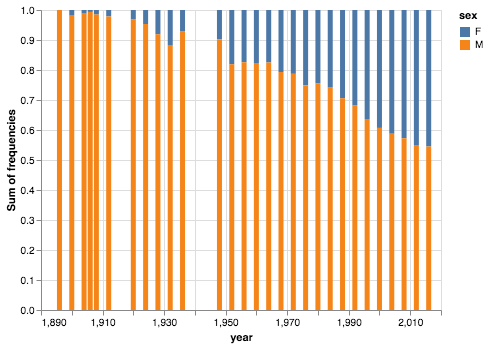

In [25]:
alt.Chart(female_dcast_tidy_df).mark_bar().encode(
    x='year',
    y=alt.Y('sum(frequencies)', stack="normalize"),
    color=alt.Color('sex'),
)

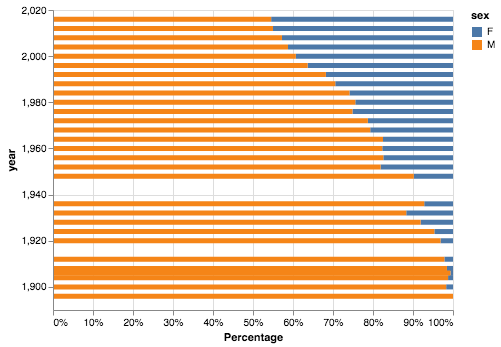

In [26]:
alt.Chart(female_dcast_tidy_df).mark_bar().encode(
    x=alt.X('sum(frequencies)', stack="normalize", axis=alt.Axis(format='%', title='Percentage')),
    y='year',
    color='sex',
    tooltip=['year','female_percent:Q']
).interactive()

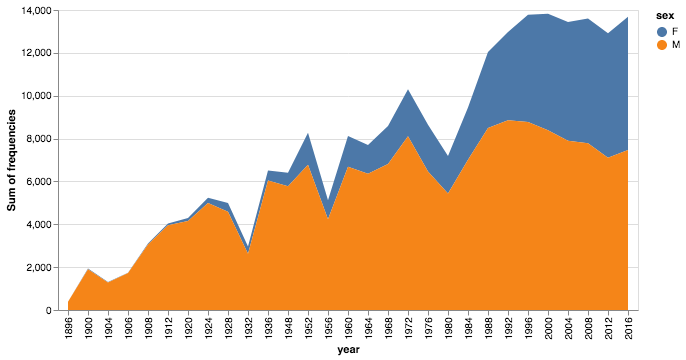

In [27]:
alt.Chart(female_dcast_tidy_df).mark_area().encode(
    x="year:N",
    y="sum(frequencies):Q",
    color="sex:N",
    tooltip=['year','female_percent:Q']
)

In [28]:
continent=pd.read_csv('/Users/Tal/Desktop/continent.csv')

In [29]:
continent.head(2)

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0


In [30]:
continent_simple = continent[['Continent_Name','Three_Letter_Country_Code']]
continent_simple.columns=['Continent_Name','NOC']
continent_simple.head(2)

,Continent_Name,NOC
0,Asia,AFG
1,Europe,ALB


In [31]:
summer_con=summer.merge(continent_simple, on='NOC', how='inner')
summer_con.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Continent_Name
5989,70232,Aarne Ulf Kristian Lindroos,M,27.0,192.0,88.5,Finland,FIN,1988 Summer,1988,Summer,Seoul,Rowing,Rowing Men's Coxless Pairs,NaN,Europe
28929,75818,Nuria Martnez Prat,F,24.0,177.0,72.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Basketball,Basketball Women's Basketball,NaN,Europe
114577,26934,Fernanda Demtrio Decnop Coelho,F,29.0,172.0,67.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's One Person Dinghy,NaN,South America
112228,118051,Kenji Takeya,M,34.0,175.0,65.0,Japan,JPN,2004 Summer,2004,Summer,Athina,Cycling,"Cycling Men's Mountainbike, Cross-Country",NaN,Asia
150230,127638,Letitia Alma Vriesde,F,35.0,159.0,55.0,Suriname,SUR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 800 metres,NaN,South America


In [32]:
summer_con_simple = summer_con[['Sex', 'Team','Year','Continent_Name']]
summer_con_simple.head()

,Sex,Team,Year,Continent_Name
0,M,China,1992,Asia
1,M,China,2012,Asia
2,M,China,2000,Asia
3,M,China,2004,Asia
4,F,China,2016,Asia


In [33]:
summer_con_classified=pd.crosstab(summer_con_simple.Year, [summer_con_simple.Sex,summer_con_simple.Continent_Name], margins=True)

In [34]:
summer_con_classified.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2004              127  1237   1938           726     366           283    344   
2008              152  1340   2205           729     374           334    300   
2012              198  1260   2292           718     358           315    374   
2016              240  1252   2209           806     396           489    339   
All              1213  9551  21348          8568    3407          2466   5295   

Sex                                                                  All  
Continent_Name   Asia Europe North America Oceania South America          
Year                                                                      
2004             1503   2920           840     447           389   11120  
2008             1661   2893           901     438           419   11746  
2012             1404   2801           716     408           412   11256  
2016             1377   2617           780     398           687   11590  
All             18184  62905         20425    6182          7307  166851

In [35]:
summer_con_classified.rename(columns={'All':'coltotal'},index={'All':'rowtotal'},inplace=True)
summer_con_classified.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2004              127  1237   1938           726     366           283    344   
2008              152  1340   2205           729     374           334    300   
2012              198  1260   2292           718     358           315    374   
2016              240  1252   2209           806     396           489    339   
rowtotal         1213  9551  21348          8568    3407          2466   5295   

Sex                                                              coltotal  
Continent_Name   Asia Europe North America Oceania South America           
Year                                                                       
2004             1503   2920           840     447           389    11120  
2008             1661   2893           901     438           419    11746  
2012             1404   2801           716     408           412    11256  
2016             1377   2617           780     398           687    11590  
rowtotal        18184  62905         20425    6182          7307   166851

In [36]:
df=summer_con_classified.div(summer_con_classified['coltotal'],axis=0)
df.tail()

Sex                    F                                              \
Continent_Name    Africa      Asia    Europe North America   Oceania   
Year                                                                   
2004            0.011421  0.111241  0.174281      0.065288  0.032914   
2008            0.012941  0.114081  0.187723      0.062064  0.031841   
2012            0.017591  0.111940  0.203625      0.063788  0.031805   
2016            0.020708  0.108024  0.190595      0.069543  0.034167   
rowtotal        0.007270  0.057243  0.127946      0.051351  0.020419   

Sex                                  M                                    \
Continent_Name South America    Africa      Asia    Europe North America   
Year                                                                       
2004                0.025450  0.030935  0.135162  0.262590      0.075540   
2008                0.028435  0.025541  0.141410  0.246297      0.076707   
2012                0.027985  0.033227  0.124733  0.248845      0.063611   
2016                0.042192  0.029249  0.118809  0.225798      0.067299   
rowtotal            0.014780  0.031735  0.108983  0.377013      0.122415   

Sex                                    coltotal  
Continent_Name   Oceania South America           
Year                                             
2004            0.040198      0.034982      1.0  
2008            0.037289      0.035672      1.0  
2012            0.036247      0.036603      1.0  
2016            0.034340      0.059275      1.0  
rowtotal        0.037051      0.043794      1.0

In [37]:
df['female_percentage']=df.iloc[:,0:5].sum(axis=1)
df.tail(6)

Sex                    F                                              \
Continent_Name    Africa      Asia    Europe North America   Oceania   
Year                                                                   
2000            0.013364  0.092264  0.175705      0.063737  0.039750   
2004            0.011421  0.111241  0.174281      0.065288  0.032914   
2008            0.012941  0.114081  0.187723      0.062064  0.031841   
2012            0.017591  0.111940  0.203625      0.063788  0.031805   
2016            0.020708  0.108024  0.190595      0.069543  0.034167   
rowtotal        0.007270  0.057243  0.127946      0.051351  0.020419   

Sex                                  M                                    \
Continent_Name South America    Africa      Asia    Europe North America   
Year                                                                       
2000                0.019104  0.029898  0.134841  0.276364      0.080356   
2004                0.025450  0.030935  0.135162  0.262590      0.075540   
2008                0.028435  0.025541  0.141410  0.246297      0.076707   
2012                0.027985  0.033227  0.124733  0.248845      0.063611   
2016                0.042192  0.029249  0.118809  0.225798      0.067299   
rowtotal            0.014780  0.031735  0.108983  0.377013      0.122415   

Sex                                    coltotal female_percentage  
Continent_Name   Oceania South America                             
Year                                                               
2000            0.045147      0.029470      1.0          0.384820  
2004            0.040198      0.034982      1.0          0.395144  
2008            0.037289      0.035672      1.0          0.408650  
2012            0.036247      0.036603      1.0          0.428749  
2016            0.034340      0.059275      1.0          0.423037  
rowtotal        0.037051      0.043794      1.0          0.264230

In [38]:
df_norow=df.drop(df.tail(1).index,inplace=False)
df_norow.tail()

Sex                    F                                              \
Continent_Name    Africa      Asia    Europe North America   Oceania   
Year                                                                   
2000            0.013364  0.092264  0.175705      0.063737  0.039750   
2004            0.011421  0.111241  0.174281      0.065288  0.032914   
2008            0.012941  0.114081  0.187723      0.062064  0.031841   
2012            0.017591  0.111940  0.203625      0.063788  0.031805   
2016            0.020708  0.108024  0.190595      0.069543  0.034167   

Sex                                  M                                    \
Continent_Name South America    Africa      Asia    Europe North America   
Year                                                                       
2000                0.019104  0.029898  0.134841  0.276364      0.080356   
2004                0.025450  0.030935  0.135162  0.262590      0.075540   
2008                0.028435  0.025541  0.141410  0.246297      0.076707   
2012                0.027985  0.033227  0.124733  0.248845      0.063611   
2016                0.042192  0.029249  0.118809  0.225798      0.067299   

Sex                                    coltotal female_percentage  
Continent_Name   Oceania South America                             
Year                                                               
2000            0.045147      0.029470      1.0          0.384820  
2004            0.040198      0.034982      1.0          0.395144  
2008            0.037289      0.035672      1.0          0.408650  
2012            0.036247      0.036603      1.0          0.428749  
2016            0.034340      0.059275      1.0          0.423037

In [39]:
df_norow_female=df_norow.drop(df_norow.iloc[:,6:12],axis=1,inplace=False)
df_norow_female.tail()

Sex                    F                                              \
Continent_Name    Africa      Asia    Europe North America   Oceania   
Year                                                                   
2000            0.013364  0.092264  0.175705      0.063737  0.039750   
2004            0.011421  0.111241  0.174281      0.065288  0.032914   
2008            0.012941  0.114081  0.187723      0.062064  0.031841   
2012            0.017591  0.111940  0.203625      0.063788  0.031805   
2016            0.020708  0.108024  0.190595      0.069543  0.034167   

Sex                          coltotal female_percentage  
Continent_Name South America                             
Year                                                     
2000                0.019104      1.0          0.384820  
2004                0.025450      1.0          0.395144  
2008                0.028435      1.0          0.408650  
2012                0.027985      1.0          0.428749  
2016                0.042192      1.0          0.423037

In [40]:
# Here I'll re-do what I have done. 
summer_con_classified2=pd.crosstab(summer_con_simple.Year, [summer_con_simple.Sex,summer_con_simple.Continent_Name])
summer_con_classified2.tail()

Sex                 F                                                       M  \
Continent_Name Africa  Asia Europe North America Oceania South America Africa   
Year                                                                            
2000              156  1077   2051           744     464           223    349   
2004              127  1237   1938           726     366           283    344   
2008              152  1340   2205           729     374           334    300   
2012              198  1260   2292           718     358           315    374   
2016              240  1252   2209           806     396           489    339   

Sex                                                              
Continent_Name  Asia Europe North America Oceania South America  
Year                                                             
2000            1574   3226           938     527           344  
2004            1503   2920           840     447           389  
2008            1661   2893           901     438           419  
2012            1404   2801           716     408           412  
2016            1377   2617           780     398           687

In [41]:
female_dcast_tidy_df.tail()

,year,all,f_prct,sex,frequencies,female_percent
53,2000,13821,0.392953,M,8390,39.3
54,2004,13443,0.412557,M,7897,41.3
55,2008,13602,0.427584,M,7786,42.8
56,2012,12920,0.450077,M,7105,45.0
57,2016,13688,0.454632,M,7465,45.5


In [42]:
female_dcast_tidy_df['male_percentage']=100- female_dcast_tidy_df['female_percent']
female_dcast_tidy_df['percentage']=female_dcast_tidy_df['frequencies']/female_dcast_tidy_df['all']
female_dcast_tidy_df.tail()


,year,all,f_prct,sex,frequencies,female_percent,male_percentage,percentage
53,2000,13821,0.392953,M,8390,39.3,60.7,0.607047
54,2004,13443,0.412557,M,7897,41.3,58.7,0.587443
55,2008,13602,0.427584,M,7786,42.8,57.2,0.572416
56,2012,12920,0.450077,M,7105,45.0,55.0,0.549923
57,2016,13688,0.454632,M,7465,45.5,54.5,0.545368


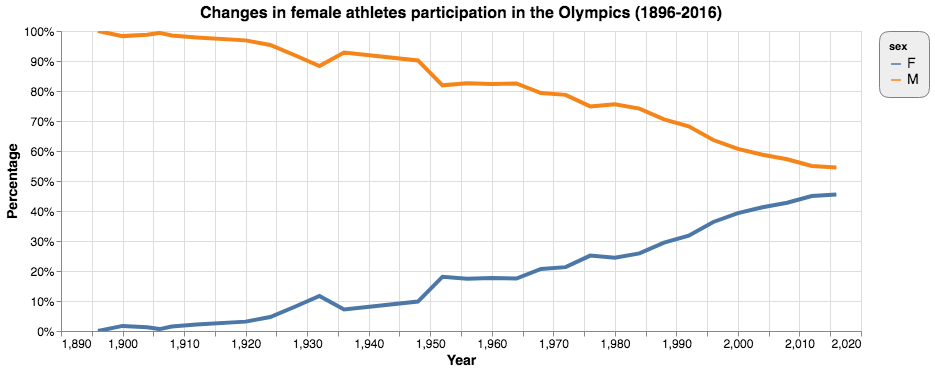

In [61]:
source = female_dcast_tidy_df

alt.Chart(source, title = 'Changes in female athletes participation in the Olympics (1896-2016)').mark_line(size=4
).encode(
    x=alt.X('year',title='Year'),
    y= alt.Y('percentage', axis=alt.Axis(format='%', title='Percentage')),
    color='sex',
    tooltip=['year','percentage:Q']
).interactive().properties(
    width=800,
    height=300).configure_title(
    fontSize=16).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_legend(
    strokeColor='gray',
    fillColor='#EEEEEE',
    padding=10,
    cornerRadius=10,
    labelFontSize=14
)


